In [ ]:
#Install R and rpy2

In [ ]:
!apt-get install r-base
!pip install rpy2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Load the R magic extension

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Importing the packages

In [ ]:
%%R
install.packages("caret")
install.packages("tidyverse")
install.packages("magrittr")

library(caret)
library(tidyverse)
library(magrittr)

(as ‘lib’ is unspecified)




















































































	‘/tmp/RtmpzQXAad/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpzQXAad/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpzQXAad/downloaded_packages’





── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: ‘magrittr’



    set_names



    extract




In [ ]:
%%R

pathgerman  <- ("german_credit.csv")
german <- read.csv(pathgerman,header = T)

In [ ]:
%%R

german %>% str()

'data.frame':	1000 obs. of  62 variables:
 $ Duration                              : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Amount                                : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ InstallmentRatePercentage             : int  4 2 2 2 3 2 3 2 2 4 ...
 $ ResidenceDuration                     : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Age                                   : int  67 22 49 45 53 35 53 35 61 28 ...
 $ NumberExistingCredits                 : int  2 1 1 1 2 1 1 1 1 2 ...
 $ NumberPeopleMaintenance               : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Telephone                             : int  0 1 1 1 1 0 1 0 1 1 ...
 $ ForeignWorker                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Class                                 : chr  "Good" "Bad" "Good" "Good" ...
 $ CheckingAccountStatus.lt.0            : int  1 0 0 1 1 0 0 0 0 0 ...
 $ CheckingAccountStatus.0.to.200        : int  0 1 0 0 0 0 0 1 0 1 ...
 $ CheckingAccountStatus.gt.200       

In [ ]:
%%R

# Checking missing value for each column function
naratio <- function(x) {100*sum(is.na(x)) / length(x)}

In [ ]:
%%R

# Check on missing value
options(warn = -1)
german %>% summarise_all(funs(naratio))

  Duration Amount InstallmentRatePercentage ResidenceDuration Age
1        0      0                         0                 0   0
  NumberExistingCredits NumberPeopleMaintenance Telephone ForeignWorker Class
1                     0                       0         0             0     0
  CheckingAccountStatus.lt.0 CheckingAccountStatus.0.to.200
1                          0                              0
  CheckingAccountStatus.gt.200 CheckingAccountStatus.none
1                            0                          0
  CreditHistory.NoCredit.AllPaid CreditHistory.ThisBank.AllPaid
1                              0                              0
  CreditHistory.PaidDuly CreditHistory.Delay CreditHistory.Critical
1                      0                   0                      0
  Purpose.NewCar Purpose.UsedCar Purpose.Furniture.Equipment
1              0               0                           0
  Purpose.Radio.Television Purpose.DomesticAppliance Purpose.Repairs
1                    

In [ ]:
%%R

# split dataset into 80/20
set.seed(29)
id <- createDataPartition(y = german$Class, p = 0.8, list = FALSE)

train_data <- german[id, ]
test_data <- german[-id, ]

In [ ]:
%%R

head(train_data,5)

  Duration Amount InstallmentRatePercentage ResidenceDuration Age
1        6   1169                         4                 4  67
2       48   5951                         2                 2  22
3       12   2096                         2                 3  49
5       24   4870                         3                 4  53
6       36   9055                         2                 4  35
  NumberExistingCredits NumberPeopleMaintenance Telephone ForeignWorker Class
1                     2                       1         0             1  Good
2                     1                       1         1             1   Bad
3                     1                       2         1             1  Good
5                     2                       2         1             1   Bad
6                     1                       2         0             1  Good
  CheckingAccountStatus.lt.0 CheckingAccountStatus.0.to.200
1                          1                              0
2               

In [ ]:
%%R
#------------------------
#   XGboost
#------------------------
# cross - validation condition setup
ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 6, summaryFunction = multiClassSummary)

In [ ]:
%%R
#----------------
#   XGBoost
#----------------
set.seed(29)
model_xgb_null2 <- train(Class ~ ., data = train_data, method = "xgbTree", preProcess = NULL, trControl = ctrl)

1 package is needed and is not installed. (xgboost). Would you like to try to install it now?
1: yes
2: no

Selection: yes


(as ‘lib’ is unspecified)







	‘/tmp/RtmpzQXAad/downloaded_packages’



[20:48:35] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:35] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:36] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:36] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:36] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:36] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:37] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:37] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:37] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[20:48:37] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

In [ ]:

%%R
# Convert the 'Class' column to a factor in both train_data and test_data
train_data$Class <- as.factor(train_data$Class)
test_data$Class <- as.factor(test_data$Class)

# Now run the prediction and confusion matrix again
pred1 <- predict(model_xgb_null2, test_data)
confusionMatrix(pred1, test_data$Class)


Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   24   12
      Good  36  128
                                          
               Accuracy : 0.76            
                 95% CI : (0.6947, 0.8174)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.0359478       
                                          
                  Kappa : 0.3548          
                                          
 Mcnemar's Test P-Value : 0.0009009       
                                          
            Sensitivity : 0.4000          
            Specificity : 0.9143          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.7805          
             Prevalence : 0.3000          
         Detection Rate : 0.1200          
   Detection Prevalence : 0.1800          
      Balanced Accuracy : 0.6571          
                                          
       'Positive' Class : Bad             
                           

In [ ]:
%%R
#------------------
#   Logistic
#------------------
options(warn=-1)
model_logit_null2 <- train(Class ~ ., data = train_data, method = "glm",
                           family = "binomial", preProcess = NULL, trControl = ctrl)

In [ ]:
%%R
# output of Logistic:
options(warn=-1)
pred2 <- predict(model_logit_null2, test_data)
confusionMatrix(pred2, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   30   17
      Good  30  123
                                       
               Accuracy : 0.765        
                 95% CI : (0.7, 0.8219)
    No Information Rate : 0.7          
    P-Value [Acc > NIR] : 0.02493      
                                       
                  Kappa : 0.4036       
                                       
 Mcnemar's Test P-Value : 0.08005      
                                       
            Sensitivity : 0.5000       
            Specificity : 0.8786       
         Pos Pred Value : 0.6383       
         Neg Pred Value : 0.8039       
             Prevalence : 0.3000       
         Detection Rate : 0.1500       
   Detection Prevalence : 0.2350       
      Balanced Accuracy : 0.6893       
                                       
       'Positive' Class : Bad          
                                       


In [ ]:
%%R
#------------------
#   KNN
#------------------
options(warn=-1)
model_KNN_null2 <- train(Class ~ ., data = train_data, method = "knn", preProcess = NULL, trControl = ctrl)


In [ ]:
%%R
# output of KNN:
options(warn=-1)
predKNN <- predict(model_KNN_null2, test_data)
confusionMatrix(predKNN, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   10   16
      Good  50  124
                                          
               Accuracy : 0.67            
                 95% CI : (0.6002, 0.7347)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.8421          
                                          
                  Kappa : 0.0625          
                                          
 Mcnemar's Test P-Value : 4.865e-05       
                                          
            Sensitivity : 0.1667          
            Specificity : 0.8857          
         Pos Pred Value : 0.3846          
         Neg Pred Value : 0.7126          
             Prevalence : 0.3000          
         Detection Rate : 0.0500          
   Detection Prevalence : 0.1300          
      Balanced Accuracy : 0.5262          
                                          
       'Positive' Class : Bad             
                           

In [ ]:
%%R

#------------------
#   Random Forest
#------------------
options(warn=-1)
model_RF_null2 <- train(Class ~ ., data = train_data, method = "rf", preProcess = NULL, trControl = ctrl)

1 package is needed and is not installed. (randomForest). Would you like to try to install it now?
1: yes
2: no

Selection: yes


(as ‘lib’ is unspecified)







	‘/tmp/RtmpzQXAad/downloaded_packages’



In [ ]:
%%R
# output of Random Forest:
options(warn=-1)
predRF <- predict(model_RF_null2, test_data)
confusionMatrix(predRF, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   29   13
      Good  31  127
                                          
               Accuracy : 0.78            
                 95% CI : (0.7161, 0.8354)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.007151        
                                          
                  Kappa : 0.4271          
                                          
 Mcnemar's Test P-Value : 0.010382        
                                          
            Sensitivity : 0.4833          
            Specificity : 0.9071          
         Pos Pred Value : 0.6905          
         Neg Pred Value : 0.8038          
             Prevalence : 0.3000          
         Detection Rate : 0.1450          
   Detection Prevalence : 0.2100          
      Balanced Accuracy : 0.6952          
                                          
       'Positive' Class : Bad             
                           

In [ ]:
%%R
#------------------
#   Support Vector Machine
#------------------
options(warn=-1)
model_SVM_null2 <- train(Class ~ ., data = train_data, method = "svmLinear", preProcess = NULL, trControl = ctrl)

1 package is needed and is not installed. (kernlab). Would you like to try to install it now?
1: yes
2: no

Selection: yes


(as ‘lib’ is unspecified)







	‘/tmp/RtmpzQXAad/downloaded_packages’



In [ ]:
%%R
# output of SVM:
options(warn=-1)
predSVM <- predict(model_SVM_null2, test_data)
confusionMatrix(predSVM, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   21   11
      Good  39  129
                                         
               Accuracy : 0.75           
                 95% CI : (0.684, 0.8084)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 0.0695453      
                                         
                  Kappa : 0.3132         
                                         
 Mcnemar's Test P-Value : 0.0001343      
                                         
            Sensitivity : 0.3500         
            Specificity : 0.9214         
         Pos Pred Value : 0.6562         
         Neg Pred Value : 0.7679         
             Prevalence : 0.3000         
         Detection Rate : 0.1050         
   Detection Prevalence : 0.1600         
      Balanced Accuracy : 0.6357         
                                         
       'Positive' Class : Bad            
                                         


In [ ]:
%%R
#plotting results
my_box_plot <- function(model1, model2, model3, model4, model5) {

  u1 <- model1$resample %>%
    select(-Resample) %>%
    mutate(Model = "XGBoost")

  u2 <- model2$resample %>%
    select(-Resample) %>%
    mutate(Model = "Logistic")

  u3 <- model3$resample %>%
    select(-Resample) %>%
    mutate(Model = "KNN")

  u4 <- model4$resample %>%
    select(-Resample) %>%
    mutate(Model = "Random Forest")

  u5 <- model5$resample %>%
    select(-Resample) %>%
    mutate(Model = "SVM")

  all_results <- rbind(u1, u2, u3, u4, u5)

  plot <- all_results_4 <- all_results %>%
    select(Accuracy, Pos_Pred_Value, Neg_Pred_Value, Kappa, Model) %>%
    gather(Criteria, Value, -Model) %>%
    ggplot(aes(Model, Value, color = Model, fill = Model)) +
    geom_boxplot(alpha = 0.3, show.legend = FALSE) +
    facet_wrap(~ Criteria, scales = "free") +
    coord_flip() +
    theme_minimal() +
    labs(x = NULL, y = NULL,
         title = "A comparison between two models based on four Criterion")

  return(plot)
}


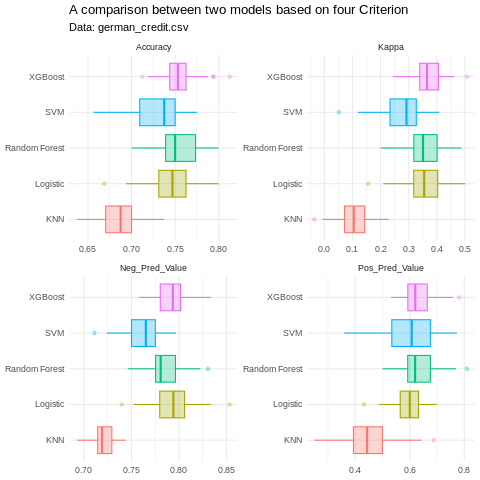

In [ ]:
%%R
options(repr.plot.width = 10, repr.plot.height = 8)
my_box_plot(model1 = model_xgb_null2, model2 = model_logit_null2, model3 = model_KNN_null2,
            model4 = model_RF_null2, model5 = model_SVM_null2) +
  labs(subtitle = "Data: german_credit.csv")